<a href="https://colab.research.google.com/github/rodirodrigorodrigues/Data-Scientist-Training-The-Complete-Course/blob/main/section_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [52]:
dataset = pd.read_csv("Churn.csv", sep=";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [53]:
# row x columns
dataset.shape

(999, 12)

In [54]:
dataset.columns = ["ID", "SCORE", "ESTADO", "GENERO", "IDADE", "PATRIMONIO", "SALDO", "PRODUTOS",
                   "TEM_CART_CREDITO", "ATIVO", "SALARIO", "SAIU"]

In [55]:
dataset.head()

,ID,SCORE,ESTADO,GENERO,IDADE,PATRIMONIO,SALDO,PRODUTOS,TEM_CART_CREDITO,ATIVO,SALARIO,SAIU
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Analise exploratória de dados categoricos

In [56]:

agrupado = dataset.groupby(["ESTADO"]).size()

# RP e TD são Estados invalidos
# SP tá fora do dominio (somente estados da regisão SUL)
agrupado

# agrupado.plot.bar(color="gray")

,0
ESTADO,
PR,257
RP,1
RS,478
SC,258
SP,4
TD,1


In [57]:
# analise exploratória dos dados categoricos
agrupado = dataset.groupby(["GENERO"]).size()

# Diversos dominios com o mesmo significado
# F, Fem e Feminino
# M, Masculino
# agrupado

# agrupado.plot.bar(color="gray")

# Encontramos 8 valores sem dominio
dataset["GENERO"].isnull().sum()

np.int64(8)

Analise exploratória de dados numericos

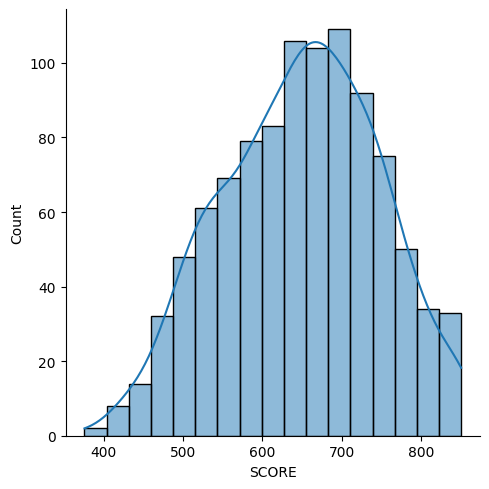

In [58]:
# dataset["SCORE"].describe()

# srn.boxplot(dataset["SCORE"]).set_title("SCORE")

# kde, ativa a curva de densidade
srn.displot(dataset["SCORE"], kde=True)

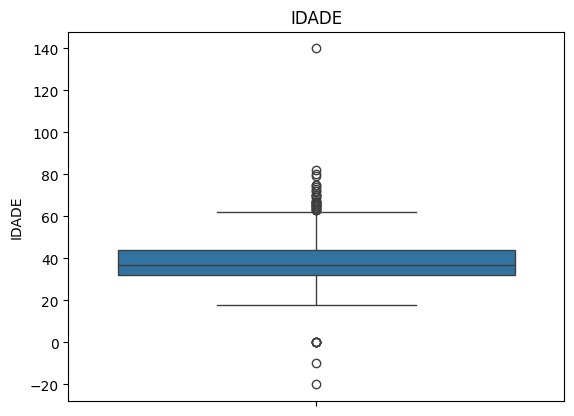

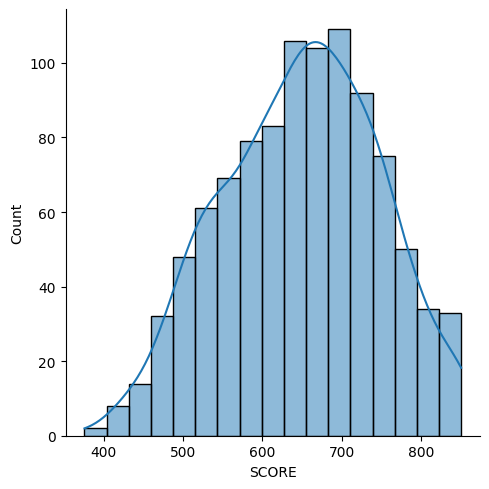

In [59]:
# encontramos idades negativas e idades muito elevadas.
dataset["IDADE"].describe()

# encontramos outliers
srn.boxplot(dataset["IDADE"]).set_title("IDADE")

# kde, ativa a curva de densidade
srn.displot(dataset["SCORE"], kde=True)

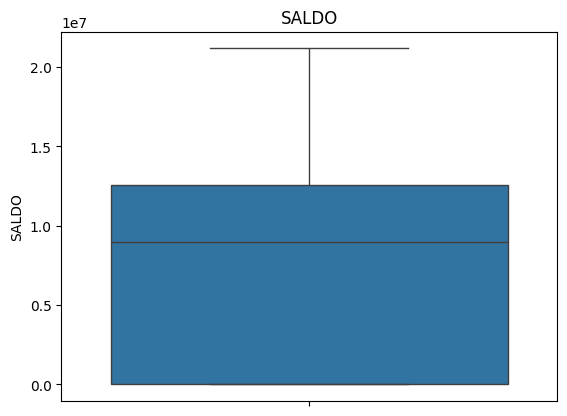

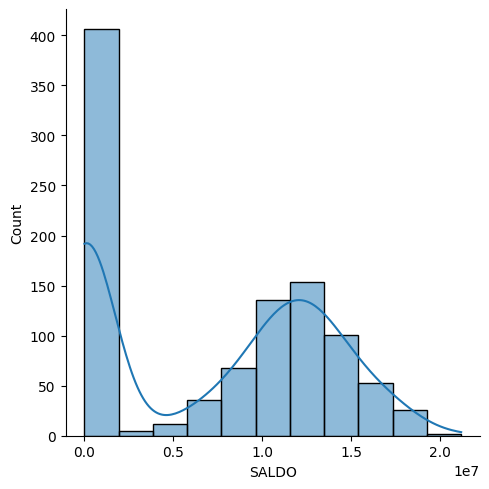

In [60]:
dataset["SALDO"].describe()

srn.boxplot(dataset["SALDO"]).set_title("SALDO")

srn.displot(dataset["SALDO"], kde=True)

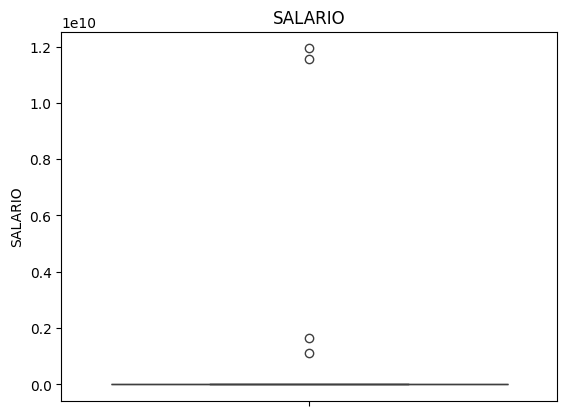

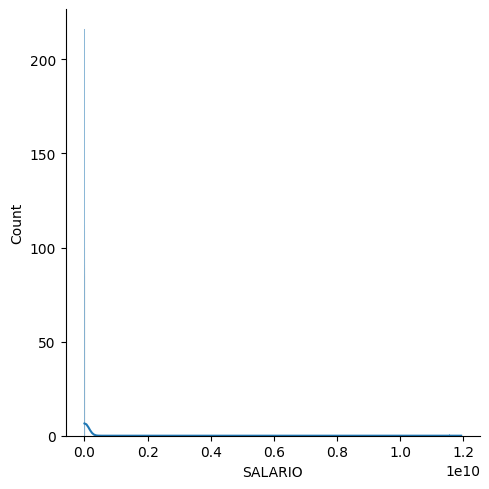

In [61]:
dataset["SALARIO"].describe()

srn.boxplot(dataset["SALARIO"]).set_title("SALARIO")

srn.displot(dataset["SALARIO"], kde=True)

In [ ]:
# Encontrando valores Nan

In [62]:
dataset.isnull().sum()

,0
ID,0
SCORE,0
ESTADO,0
GENERO,8
IDADE,0
PATRIMONIO,0
SALDO,0
PRODUTOS,0
TEM_CART_CREDITO,0
ATIVO,0


Tratamento de dados

In [63]:
dataset["SALARIO"] = dataset["SALARIO"].astype(float)

mediana = sts.median(dataset["SALARIO"])
mediana

70518.0

In [64]:
# Preenche os valores Nan com a mediana do salario
dataset["SALARIO"].fillna(mediana, inplace=True)
dataset.isnull().sum()

/tmp/ipython-input-3400644607.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["SALARIO"].fillna(mediana, inplace=True)


,0
ID,0
SCORE,0
ESTADO,0
GENERO,8
IDADE,0
PATRIMONIO,0
SALDO,0
PRODUTOS,0
TEM_CART_CREDITO,0
ATIVO,0


In [65]:
# Preenche os valors Nan com a moda do Genero
dataset["GENERO"].fillna("Masculino", inplace=True)

# Normaliza os dominios de Genero pela moda
dataset.loc[dataset["GENERO"] == "M", "GENERO"] = "Masculino"
dataset.loc[dataset["GENERO"].isin(["F", "Fem"]), "GENERO"] = "Feminino"

# agrupado = dataset.groupby(["GENERO"]).size()
# agrupado

/tmp/ipython-input-1651076823.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["GENERO"].fillna("Masculino", inplace=True)


In [66]:
# Converte o tipo da coluna idade para numerico
dataset["IDADE"] = pd.to_numeric(dataset["IDADE"], errors="coerce")

# Localiza linhas com outliers
dataset.loc[(dataset["IDADE"] < 0) | (dataset["IDADE"] > 120)]

# Descobre a mediana para substituir nos outliers
mediana = sts.median(dataset["IDADE"])

# Substitui
dataset.loc[(dataset["IDADE"] < 0) | (dataset["IDADE"] > 120)] = mediana

# Consulta novamente as linhs com outliers
dataset.loc[(dataset["IDADE"] < 0) | (dataset["IDADE"] > 120)]

,ID,SCORE,ESTADO,GENERO,IDADE,PATRIMONIO,SALDO,PRODUTOS,TEM_CART_CREDITO,ATIVO,SALARIO,SAIU


In [67]:
dataset["IDADE"].dtype

dtype('int64')

In [68]:
# Procura por linhas duplicadas pelo ID, sempre observar se a regra de negócio permite itens duplicados
dataset[dataset.duplicated("ID", keep=False)]

# Remove itens duplicados mantendo a primeira ocorrencia
dataset.drop_duplicates(subset="ID", keep="first", inplace=True)

In [69]:
# Troca estados foras do dominio por RS
dataset.loc[dataset["ESTADO"].isin(["RP", "SP", "TD"]), "ESTADO"] = "RS"

In [76]:
desv = sts.stdev(dataset["SALARIO"])

dataset.loc[dataset["SALARIO"] > 2 * desv]

mediana = sts.median(dataset["SALARIO"])

dataset.loc[dataset["SALARIO"] > 2 * desv] = mediana